# **Regression Metrics Exercise (Core)**

**Name:** Kellianne Yang

## Assignment:

**The ultimate goal of this task is to predict the price based on the available features using a linear regression model.**

All of the features and the target are continuous variables.

For now, you do not need to do any cleaning of this data set. You can use it "as is."

An important exploration step is to determine if there are any moderate or strong correlations in your variables.

**Data Dictionary:**

CRIM per capita crime rate by town

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

PTRATIO pupil-teacher ratio by town

LSTAT % lower economic status of the population

PRICE Median value of owner-occupied homes in $1000's

# Preliminary steps

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
set_config(display = 'diagram')

In [ ]:
# import data
path = '/content/drive/MyDrive/Coding Dojo/06 Week 6: Regression Models/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(path)

In [ ]:
# explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [ ]:
# explore data
df.sample(10)

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
256,0.01538,0.394,7.454,34.2,15.9,3.11,44.0
178,0.06642,0.510,6.860,74.4,16.6,6.92,29.9
100,0.14866,0.520,6.727,79.9,20.9,9.42,27.5
313,0.26938,0.544,6.266,82.8,18.4,7.90,21.6
5,0.02985,0.458,6.430,58.7,18.7,5.21,28.7
12,0.09378,0.524,5.889,39.0,15.2,15.71,21.7
387,22.59710,0.700,5.000,89.5,20.2,31.99,7.4
155,3.53501,0.871,6.152,82.6,14.7,15.02,15.6
432,6.44405,0.584,6.425,74.8,20.2,12.03,16.1
255,0.03548,0.392,5.876,19.1,16.4,9.25,20.9


In [ ]:
# check for duplicated rows
df.duplicated().sum()

0

In [ ]:
# check for any missing values
df.isna().sum().sum()

0

# 1. Make a heatmap of the correlations.
Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price. Limit your analysis to these three features.

In [ ]:
# make correlations with df
corr = df.corr()

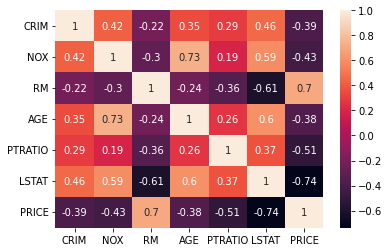

In [ ]:
# make heatmap
heatmap = sns.heatmap(corr, annot = True)

The heatmap shows that the three features most highly correlated (positively or negatively) with price are LSTAT (-0.74), RM (0.7), and PTRATIO (-0.51). 

# 2. Select ONLY the 3 features most highly correlated with price for your feature matrix (X).  

In [ ]:
# assign features to X
X = df.drop(columns = ['PRICE', 'AGE', 'NOX', 'CRIM'])
X

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
...,...,...,...
501,6.593,21.0,9.67
502,6.120,21.0,9.08
503,6.976,21.0,5.64
504,6.794,21.0,6.48


# 3.  Select price for your target vector (y).

In [ ]:
# assign 'PRICE' to y
y = df['PRICE']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

# 4. Split your data into train and test sets. 

Please use the random number 42 for consistency!

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# 5. Instantiate your model and fit it on the training set.

The target variable ('PRICE') is numeric and continuous, so I will instantiate a REGRESSION model. 

There are no missing values, so I will not instantiate column selectors or imputers.

All feature variables are numeric and continuous, so I will only instantiate one transformer (a scaler). 

I can use the scaler directly with the linear regression model (instead of creating pipelines/a column transformer/a preprocessing object). 

In [ ]:
# instantiate scaler
scaler = StandardScaler()

In [ ]:
# instantiate linear regression model
lin_reg = LinearRegression()

In [ ]:
# make pipeline for scaler and model
lin_reg_pipe = make_pipeline(scaler, lin_reg)
display(lin_reg_pipe)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
# fit model on training data only
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

# 6. Evaluate your model performance using R^2 on the training set and on the test set. 

Is there a difference between model performance on the training data vs the test data?

In [ ]:
# get predictions for training data
train_pred = lin_reg_pipe.predict(X_train)

In [ ]:
# get predictions for testing data
test_pred = lin_reg_pipe.predict(X_test)

In [ ]:
# get r2 score for training data
train_r2 = r2_score(y_train, train_pred)

In [ ]:
# get r2 score for testing data
test_r2 = r2_score(y_test, test_pred)

In [ ]:
print(f"Model Training R2: {train_r2} \n\
Model Testing R2: {test_r2}")

Model Training R2: 0.6877966145058925 
Model Testing R2: 0.6331590458194676


This model can account for about 69% of the variation in y_train using the features in X_train and about 63% of the variation in y_test using the features in X_test. 

There is a difference of about 6% in the variation the model predicts between the training data (higher) and the testing data (lower). 

# 7. Evaluate your model on both data sets using mean absolute error (MAE).

In [ ]:
# get MAE score for training data
train_MAE = mean_absolute_error(y_train, train_pred)

In [ ]:
# get MAE score for testing data
test_MAE = mean_absolute_error(y_test, test_pred)

In [ ]:
print(f"Model Training MAE: {train_MAE} \n\
Model Testing MAE: {test_MAE}")

Model Training MAE: 3.714054057158005 
Model Testing MAE: 3.3918448293813976


This model can predict the median value of owner-occupied homes ('PRICE') using features percent lower economic status of the population ('LSTAT'), pupil-to-teacher ratio by town ('PTRATIO'), and average numer of rooms per dwelling ('RM') with a Mean Average Error (MAE) of about +/-\$3,714 on the training data and about +/-\$3,392 on the testing data. (The model does a bit better on the testing data.)

# 8. Evaluate your model on both data sets using mean squared error (MSE).

In [ ]:
# get MSE score for training data
train_MSE = mean_squared_error(y_train, train_pred)

In [ ]:
# get MSE score for testing data
test_MSE = mean_squared_error(y_test, test_pred)

In [ ]:
print(f"Model Training MSE: {train_MSE} \n\
Model Testing MSE: {test_MSE}")

Model Training MSE: 27.68673681796949 
Model Testing MSE: 25.688824196675963


This model can predict the median value of owner-occupied homes ('PRICE') using features percent lower economic status of the population ('LSTAT'), pupil-to-teacher ratio by town ('PTRATIO'), and average numer of rooms per dwelling ('RM') with a Mean Standard Error (MSE) of about +/-27,687 dollars squared on the training data and about +/-25,689 dollars squared on the testing data. (The model does a bit better on the testing data.)

# 9. Evaluate your model performance using RMSE on the training set and on the test set. 

This metric is useful because the units will be in the same units as your target vector, in this case, 1,000s of dollars.

In [ ]:
# get RMSE score for training data
train_RMSE = np.sqrt(train_MSE)

In [ ]:
# get RMSE score for testing data
test_RMSE = np.sqrt(test_MSE)

In [ ]:
print(f"Model Training RMSE: {train_RMSE} \n\
Model Testing RMSE: {test_RMSE}")

Model Training RMSE: 5.261818774717492 
Model Testing RMSE: 5.0684143671049595


This model can predict the median value of owner-occupied homes ('PRICE') using features percent lower economic status of the population ('LSTAT'), pupil-to-teacher ratio by town ('PTRATIO'), and average numer of rooms per dwelling ('RM') with a Root Mean Standard Error (RMSE) of about +/-\$5,262 on the training data and about +/-\$5,068 on the testing data. (The model does a bit better on the testing data.)